<a href="https://colab.research.google.com/github/ShivaP69/Investigation_bias_deepCOVID/blob/main/autoencodercovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IN THIS CODE, WE TRY TO MAKE A REPRESENTATION OF OUR DATASET IN A SLICE-WISE AND SUBJECT-WISE MANNER.

FIRSTLY, AUTOENCODER HAS USED TO COMPRESS DATA, AND THEN WE TRIED TO PLOT OUR DATA IN TWO DIFFERENT MENTIONED MANNER. AUTOENCODER COULD NOT CAPTURE DIFFERENCES, SO FINALLY, WE USED A NON-COMPRESSED VERSION OF THE DATASET TO PRESENT THE STATE OF OUR DATASET

In [ ]:
import numpy as np
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle                                          
import cv2
import sys
from tqdm import tqdm, tqdm_notebook, tnrange
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from skimage.transform import resize
from skimage import morphology
from skimage.io import imread
from sklearn.model_selection import train_test_split

from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from keras.preprocessing.image import  img_to_array
from keras.models import Model
from keras.layers import  BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers

from tensorflow.keras.models import Model

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:


"""

import os
import sys
import shutil


try:
    shutil.rmtree('/content/drive/MyDrive/just_test_noncovid')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))"""

In [ ]:
"""

import os
try:
    os.makedirs('/content/drive/MyDrive/just_test_noncovid')
except OSError:
    pass"""

 HERE WE TRY TO MAKE SEPERATE TRAIN AND TEST DATASET (WITHOUT ANY SHARED FOLDER)


 AND AT THE SAME TIME WE GENERATE SLICE-WISE DATA ( WITH THE POSSIBILITY OF SHARED FOLDERS)

In [ ]:

path='/content/drive/MyDrive/covid/'

In [ ]:
ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])

In [ ]:
ids_covid

array(['S472710', 'S472720', 'S472730', 'S472790', 'S473770', 'S474760',
       'S474770', 'S474970', 'S475070', 'S475100', 'S475330', 'S475630',
       'S475670', 'S475840', 'S476350', 'S476380', 'S476710', 'S476990',
       'S477560', 'S477690', 'S477730', 'S477750', 'S477760', 'S477770',
       'S477970', 'S477990', 'S478000', 'S478020', 'S478690', 'S478710',
       'S478940', 'S479000', 'S479320', 'S479340', 'S479360', 'S479370',
       'S479410', 'S479550', 'S479590', 'S479610', 'S479670', 'S479940',
       'S479980', 'S480000', 'S480010', 'S480020', 'S480040', 'S480050',
       'S480250', 'S480300', 'S480330', 'S480340', 'S480360', 'S480410',
       'S480430', 'S480450', 'S480460', 'S480760', 'S480820', 'S481420',
       'S481430', 'S481470', 'S481540', 'S481550', 'S481580', 'S481590',
       'S481700', 'S481710', 'S481720', 'S481730', 'S481790', 'S482050',
       'S482160', 'S482640', 'S482870', 'S482960', 'S482970', 'S482980',
       'S483210', 'S483220', 'S483280', 'S483340', 

In [ ]:
ids_covid_train= ids_covid[:int(len(ids_covid)*0.8)]

In [ ]:
ids_covid_test=ids_covid[int(len(ids_covid)*0.8):]

In [ ]:
ids_covid_train

array(['S472710', 'S472720', 'S472730', 'S472790', 'S473770', 'S474760',
       'S474770', 'S474970', 'S475070', 'S475100', 'S475330', 'S475630',
       'S475670', 'S475840', 'S476350', 'S476380', 'S476710', 'S476990',
       'S477560', 'S477690', 'S477730', 'S477750', 'S477760', 'S477770',
       'S477970', 'S477990', 'S478000', 'S478020', 'S478690', 'S478710',
       'S478940', 'S479000', 'S479320', 'S479340', 'S479360', 'S479370',
       'S479410', 'S479550', 'S479590', 'S479610', 'S479670', 'S479940',
       'S479980', 'S480000', 'S480010', 'S480020', 'S480040', 'S480050',
       'S480250', 'S480300', 'S480330', 'S480340', 'S480360', 'S480410',
       'S480430', 'S480450', 'S480460', 'S480760', 'S480820', 'S481420',
       'S481430', 'S481470', 'S481540', 'S481550', 'S481580', 'S481590',
       'S481700', 'S481710', 'S481720', 'S481730', 'S481790', 'S482050',
       'S482160', 'S482640', 'S482870', 'S482960', 'S482970', 'S482980',
       'S483210', 'S483220', 'S483280', 'S483340', 

In [ ]:
ids_covid_test

array(['S488640', 'S488650', 'S488670', 'S488690', 'S488710', 'S488720',
       'S488740', 'S488760', 'S488800', 'S489010', 'S489050', 'S489060',
       'S489090', 'S489100', 'S489120', 'S489130', 'S489140', 'S489190',
       'S489200', 'S489380', 'S489390', 'S489440', 'S489470', 'S489480',
       'S489700', 'S489710', 'S489720', 'S489740', 'S489810', 'S489820',
       'S489860', 'S490220', 'S490230', 'S490240', 'S490310', 'S490330'],
      dtype='<U7')

In [ ]:
print('number of COVID cases:', len(ids_covid_test))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid_test:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']
    df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO'])
    # GGO=GGO+np.sum(df1['GGO'])
    b=df1.loc[(df1['GGO']==1 ), 'image number'].array
    b=shuffle(b)
    L=25
    if len(b)<25:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/patient_wise_new/test/covid'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
         if os.path.isfile(filename):
              print ("File exist")
              pass
         else:
           cv2.imwrite(filename, img) 
    directory= '/content/drive/MyDrive/instant_wise_new/covid'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
      img= cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
      os.chdir(directory)
      filename=id1+'.jpg'
      cv2.imwrite(filename, img)
            

number of COVID cases: 36
S488640
len b :  25


100%|██████████| 25/25 [00:00<00:00, 31.86it/s]


S488650
len b :  25


100%|██████████| 25/25 [00:00<00:00, 34.98it/s]


S488670
len b :  25


100%|██████████| 25/25 [00:00<00:00, 33.65it/s]


S488690
len b :  25


100%|██████████| 25/25 [00:00<00:00, 31.66it/s]


S488710
len b :  25


100%|██████████| 25/25 [00:00<00:00, 31.10it/s]


S488720
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.32it/s]


S488740
len b :  25


100%|██████████| 25/25 [00:00<00:00, 31.45it/s]


S488760
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.54it/s]


S488800
len b :  25


100%|██████████| 25/25 [00:00<00:00, 31.10it/s]


S489010
len b :  25


100%|██████████| 25/25 [00:01<00:00, 24.52it/s]


S489050
len b :  25


100%|██████████| 25/25 [00:00<00:00, 29.77it/s]


S489060
len b :  25


100%|██████████| 25/25 [00:00<00:00, 29.85it/s]


S489090
len b :  25


100%|██████████| 25/25 [00:00<00:00, 31.34it/s]


S489100
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.45it/s]


S489120
len b :  17


100%|██████████| 17/17 [00:00<00:00, 25.73it/s]


S489130
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.87it/s]


S489140
len b :  25


100%|██████████| 25/25 [00:00<00:00, 28.33it/s]


S489190
len b :  25


100%|██████████| 25/25 [00:00<00:00, 28.77it/s]


S489200
len b :  25


100%|██████████| 25/25 [00:00<00:00, 28.47it/s]


S489380
len b :  25


100%|██████████| 25/25 [00:01<00:00, 24.56it/s]


S489390
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.41it/s]


S489440
len b :  25


100%|██████████| 25/25 [00:00<00:00, 25.90it/s]


S489470
len b :  25


100%|██████████| 25/25 [00:00<00:00, 28.64it/s]


S489480
len b :  25


100%|██████████| 25/25 [00:00<00:00, 29.19it/s]


S489700
len b :  25


100%|██████████| 25/25 [00:01<00:00, 24.09it/s]


S489710
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.41it/s]


S489720
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.46it/s]


S489740
len b :  25


100%|██████████| 25/25 [00:03<00:00,  8.06it/s]


S489810
len b :  25


100%|██████████| 25/25 [00:00<00:00, 32.84it/s]


S489820
len b :  25


100%|██████████| 25/25 [00:00<00:00, 34.83it/s]


S489860
len b :  0


0it [00:00, ?it/s]
0it [00:00, ?it/s]


S490220
len b :  25


100%|██████████| 25/25 [00:00<00:00, 33.21it/s]


S490230
len b :  25


100%|██████████| 25/25 [00:00<00:00, 32.55it/s]


S490240
len b :  25


100%|██████████| 25/25 [00:00<00:00, 30.99it/s]


S490310
len b :  25


100%|██████████| 25/25 [00:00<00:00, 28.06it/s]


S490330
len b :  25


100%|██████████| 25/25 [00:00<00:00, 27.50it/s]


In [ ]:
ids_noncovid = np.sort(next(os.walk(path+'non_COVID/' ))[1]) 

In [ ]:
ids_noncovid

array(['S475620', 'S475760', 'S475810', 'S475860', 'S476140', 'S476370',
       'S476760', 'S477020', 'S477070', 'S477160', 'S477460', 'S478040',
       'S478320', 'S478380', 'S478430', 'S478510', 'S478680', 'S478730',
       'S479110', 'S480030', 'S480140', 'S480240', 'S480260', 'S480380',
       'S480680', 'S480700', 'S480730', 'S480920', 'S481030', 'S481450',
       'S481760', 'S482490', 'S482570', 'S483950', 'S488680', 'S488700',
       'S488730', 'S488770', 'S488790', 'S488810', 'S488820', 'S489020',
       'S489030', 'S489040', 'S489070', 'S489080', 'S489110', 'S489150',
       'S489160', 'S489170', 'S489180', 'S489210', 'S489410', 'S489420',
       'S489430', 'S489450', 'S489460', 'S489490', 'S489500', 'S489730',
       'S489750', 'S489770', 'S489780', 'S489790', 'S489800', 'S489830',
       'S489840', 'S489850', 'S489870', 'S492550', 'S492590', 'S492640',
       'S492650', 'S492830', 'S492840', 'S492860', 'S492880', 'S492890',
       'S492910', 'S492930', 'S492940', 'S492950', 

In [ ]:
ids_noncovid_train= ids_noncovid[:int(len(ids_noncovid)*0.8)]

In [ ]:
ids_noncovid_test= ids_noncovid[int(len(ids_noncovid)*0.8):]

In [ ]:
'read normal data'
#ids_noncovid = np.sort(next(os.walk(path+'non_COVID/' ))[1]) 
print('number of Normal cases:', len(ids_noncovid_test))  
sys.stdout.flush()

for id_ in ids_noncovid_test:
    ids=next(os.walk(path + 'non_COVID/'+id_))[2]
    ids=shuffle(ids)
    #ids=ids[:50]
    L=25
    if len(ids)<25:
      L=len(ids)
    ids=ids[:L]
    directory='/content/drive/MyDrive/patient_wise_new/test/non_covid'
    for n,id1 in tqdm(enumerate(ids), total=len(ids)): 
        img = cv2.imread(path+'non_COVID/'+id_+'/'+id1)
      
       
        os.chdir(directory)
                    
          # Filename
        filename = id1+'.jpg'
        if os.path.isfile(filename):
            print ("File exist")
            pass
        else:
          cv2.imwrite(filename, img) 
    directory= '/content/drive/MyDrive/instant_wise_new/non_covid'
    for n,id1 in tqdm(enumerate(ids), total=len(ids)): 
      img = cv2.imread(path+'non_COVID/'+id_+'/'+id1) 
      os.chdir(directory)
      filename=id1+'.jpg'
      cv2.imwrite(filename, img)


number of Normal cases: 32


100%|██████████| 25/25 [00:00<00:00, 27.59it/s]


In [ ]:
"""from PIL import Image
from numpy import asarray
image = Image.open('/content/drive/MyDrive/instant_wise_new/covid/C001_039.jpg')
# convert image to numpy array
asarray(image)"""

In [ ]:
"""#covid
list= train covid
list= test covid 
for files in os.listdir():
  if files in list1:
    
  else: 
"""

In [ ]:
"""l1= os.listdir('/content/drive/MyDrive/patient_wise_new/test/covid')
l2=os.listdir('/content/drive/MyDrive/instant_wise_new/covid')
list(set(l1) - set(l2))"""
"""
for files in diff:
  img= cv2.imread(('/content/drive/MyDrive/patient_wise/train/covid/'+ files))
  cv2.imwrite(os.path.join('/content/drive/MyDrive/instant_wise/covid' , files), img)
"""
  


"\nfor files in diff:\n  img= cv2.imread(('/content/drive/MyDrive/patient_wise/train/covid/'+ files))\n  cv2.imwrite(os.path.join('/content/drive/MyDrive/instant_wise/covid' , files), img)\n"

In [ ]:


"""l1= os.listdir('/content/drive/MyDrive/patient_wise/test/non_covid')
l2=os.listdir('/content/drive/MyDrive/instant_wise/non_covid')
list(set(l1) - set(l2))"""
"""for files in diff:
  img= cv2.imread(('/content/drive/MyDrive/patient_wise/train/non_covid/'+ files))
  cv2.imwrite(os.path.join('/content/drive/MyDrive/instant_wise/non_covid' , files), img)"""
  


"for files in diff:\n  img= cv2.imread(('/content/drive/MyDrive/patient_wise/train/non_covid/'+ files))\n  cv2.imwrite(os.path.join('/content/drive/MyDrive/instant_wise/non_covid' , files), img)"

In [ ]:
import os 
i=0

for file in os.listdir('/content/drive/MyDrive/patient_wise_new/test/non_covid'):
    if file.endswith('.jpg'):

        i+=1
print('the total number of files: ' +str(i))


the total number of files: 800


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#instant wise

In [ ]:
"""
ids_covid_test=['S472710', 'S472720', 'S472730', 'S472790']

print('number of COVID cases:', len(ids_covid_test))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))
name=[]
sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid_test:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']
    df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO'])
    # GGO=GGO+np.sum(df1['GGO'])
    b=df1.loc[(df1['GGO']==1 ), 'image number'].array
    b=shuffle(b)
    L=25
    if len(b)<25:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/just_test'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
         if os.path.isfile(filename):
              print ("File exist")
              pass
         else:
           cv2.imwrite(filename, img) 
           name.append(filename)"""


In [ ]:
"""ids_noncovid_test=['S492910', 'S492930', 'S492940', 'S492950']
name_non=[]
'read normal data'
#ids_noncovid = np.sort(next(os.walk(path+'non_COVID/' ))[1]) 
print('number of Normal cases:', len(ids_noncovid_test))  
sys.stdout.flush()

for id_ in ids_noncovid_test:
    ids=next(os.walk(path + 'non_COVID/'+id_))[2]
    ids=shuffle(ids)
    #ids=ids[:50]
    L=25
    if len(ids)<25:
      L=len(ids)
    ids=ids[:L]
    directory='/content/drive/MyDrive/just_test_noncovid'
    for n,id1 in tqdm(enumerate(ids), total=len(ids)): 
        img = cv2.imread(path+'non_COVID/'+id_+'/'+id1)
      
       
        os.chdir(directory)
                    
          # Filename
        filename = id1+'.jpg'
        if os.path.isfile(filename):
            print ("File exist")
            pass
        else:
          cv2.imwrite(filename, img) 


        name_non.append(filename)

"""

In [ ]:
"""#covid
data=[]
path='/content/drive/MyDrive/just_test'
j=0
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    print(img_array)
    new_array= cv2.resize(img_array,(128,128))

    #pd.DataFrame([new_array])
    flat_arr = new_array.ravel().tolist()
    flat_arr.append(name[j])
    j+=1
    data.append([flat_arr])
 



"""


**IN THE FOLLOWING CODE ONE TIME WE CREAT AUTOENCODER FOR SLICE-WISE DATA SPLIT AND THEN FOR PATIENT-WISE**








In [ ]:

#predict by encoder just for train data set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)



data_compressed = train_datagen.flow_from_directory(('/content/drive/MyDrive/my_file_instant_wise/train'),
                                                    class_mode='binary',                                      
                                                    batch_size=32,
                                                    target_size=(128,128),
                                                    shuffle=True)



test_generator= train_datagen.flow_from_directory(('/content/drive/MyDrive/my_file_instant_wise/val'),
                                                  target_size=(128,128),batch_size=32,class_mode='binary',shuffle=True)


Found 6044 images belonging to 2 classes.
Found 1512 images belonging to 2 classes.


In [ ]:
"""import splitfolders

main_dir = '/content/drive/MyDrive/selected_images_covid'
output_dir = '/content/drive/MyDrive/covid-images'
splitfolders.ratio(main_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)
train_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'train'),
                                                    class_mode='input',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'val'),
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='input',
                                                        shuffle=True) # set as validation data
test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                  target_size=(224,224),batch_size=32,class_mode='input',shuffle=True)
"""


Copying files: 7557 files [25:22,  4.96 files/s]


Found 6045 images belonging to 2 classes.
Found 755 images belonging to 2 classes.
Found 757 images belonging to 2 classes.


In [ ]:
#import splitfolders

#main_dir = '/content/drive/MyDrive/instant_wise_new'
output_dir = '/content/drive/MyDrive/my_file_instant_wise'

#splitfolders.ratio(main_dir, output=output_dir, seed=1337, ratio=(0.8, 0.2))
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)
train_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'train'),
                                                    class_mode='input',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=True)

test_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'val'),
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='input',
                                                        shuffle=True) # set as validation data
"""test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                  target_size=(224,224),batch_size=32,class_mode='input',shuffle=True)"""

Found 6044 images belonging to 2 classes.
Found 1512 images belonging to 2 classes.


"test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),\n                                                  target_size=(224,224),batch_size=32,class_mode='input',shuffle=True)"

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
 


input = layers.Input(shape=(224, 224, 3))
## ENCODER ##
# Conv1 #
encoded = Conv2D(filters = 32, kernel_size = (3,3), activation='relu', padding='same')(input)
encoded = MaxPooling2D(pool_size = (3, 3), padding='same', strides=2)(encoded)

encoded = Conv2D(filters = 32, kernel_size = (3,3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same', strides=2)(encoded)
encoded = Conv2D(filters = 32, kernel_size = (3,3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same', strides=2)(encoded)
encoded = Conv2D(filters = 1, kernel_size = (3,3), activation='relu', padding='same')(encoded)
encoded= MaxPooling2D(pool_size = (2, 2), padding='same', strides=2)(encoded)
## DECODER ##

# DeConv1
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded= Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(decoded)
print(decoded.shape)


# DeConv

## ENCODER and AUTOENCODER ##

autoencoder = Model(input, decoded)
encoder = Model(input, encoded)

autoencoder.compile(optimizer='adam', loss= 'mse' ,metrics=['accuracy'])

(None, 224, 224, 3)


In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 32)        9248  

In [ ]:
autoencoder.fit(train_generator,
steps_per_epoch = train_generator.samples//32,
validation_data= test_generator,


    validation_steps = test_generator.samples // 32,
    epochs = 4)

Epoch 1/4
188/188 [==============================] - 101s 527ms/step - loss: 0.0680 - accuracy: 0.3243 - val_loss: 0.0377 - val_accuracy: 0.2296
Epoch 2/4
188/188 [==============================] - 100s 535ms/step - loss: 0.0343 - accuracy: 0.2954 - val_loss: 0.0325 - val_accuracy: 0.2964
Epoch 3/4
188/188 [==============================] - 101s 535ms/step - loss: 0.0325 - accuracy: 0.3108 - val_loss: 0.0309 - val_accuracy: 0.3123
Epoch 4/4
188/188 [==============================] - 100s 534ms/step - loss: 0.0306 - accuracy: 0.3158 - val_loss: 0.0301 - val_accuracy: 0.3163


In [ ]:
#This part is related to tsne

In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_model2.h5')

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/autoencoder_model2.h5')

In [ ]:
model.fit(test_generator,
steps_per_epoch = test_generator.samples//32,
validation_data= test_generator,


    validation_steps = test_generator.samples // 32,
    epochs = 3)

Epoch 1/3
47/47 [==============================] - 40s 848ms/step - loss: 0.0296 - accuracy: 0.3225 - val_loss: 0.0295 - val_accuracy: 0.3299
Epoch 2/3
47/47 [==============================] - 39s 834ms/step - loss: 0.0309 - accuracy: 0.3341 - val_loss: 0.0303 - val_accuracy: 0.3371
Epoch 3/3
47/47 [==============================] - 40s 853ms/step - loss: 0.0296 - accuracy: 0.3382 - val_loss: 0.0292 - val_accuracy: 0.3442


In [ ]:
model.save('/content/drive/MyDrive/autoencoder_model2.h5')

In [ ]:
autoencoder=model

In [ ]:
x,y=test_generator.next()
z=autoencoder.predict(x)

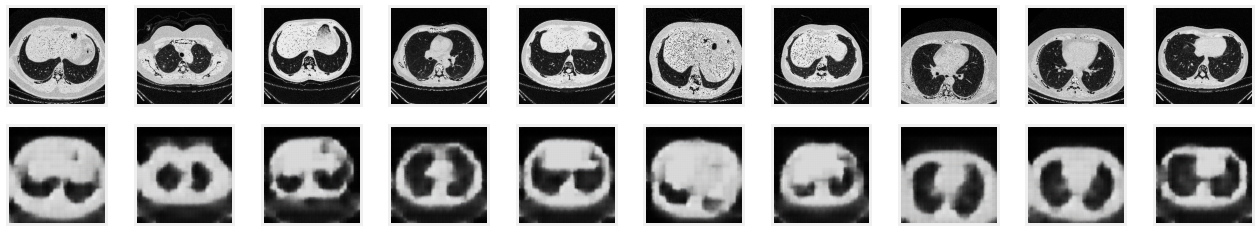

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow((x[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((z[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
k=encoder.predict(x)

In [ ]:
encoder.compile(optimizer='adam')

In [ ]:
encoder.save('/content/drive/MyDrive/encoder_model2.h5')

In [ ]:
encoder=keras.models.load_model('/content/drive/MyDrive/encoder_model2.h5')

In [ ]:

#predict by encoder just for train data set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)



data_compressed = train_datagen.flow_from_directory(('/content/drive/MyDrive/my_file_instant_wise/train'),
                                                    class_mode='binary',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=False)



test_generator= train_datagen.flow_from_directory(('/content/drive/MyDrive/my_file_instant_wise/val'),
                                                  target_size=(224,224),batch_size=32,class_mode='binary',shuffle=False)


Found 6044 images belonging to 2 classes.
Found 1512 images belonging to 2 classes.


In [ ]:
#train
batch_index=0
total_list=[]
while batch_index <= data_compressed.batch_index:
    data,label = data_compressed.next()
    
    prediction=encoder.predict(data)
   
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      flat_arr.append(label[j])
      j+=1
      total_list.append(flat_arr)


    batch_index = batch_index + 1


In [ ]:
#train
batch_index=0
total_list=[]
while batch_index <= data_compressed.batch_index:
    data,label = data_compressed.next()
    prediction=data
    #prediction=encoder.predict(data)
   
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      flat_arr.append(label[j])
      j+=1
      total_list.append(flat_arr)


    batch_index = batch_index + 1

In [ ]:
df = pd.DataFrame(total_list)

In [ ]:
#df= df.iloc[:,:-1]

In [ ]:
df=df.assign(classlable=1) #train

In [ ]:
df.to_excel("/content/drive/MyDrive/train_compressed_sclice_wise.xlsx")  #train

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/train_compressed_sclice_wise.xlsx')

In [ ]:
"""df=df.assign(classlable=1) #train"""

In [ ]:
"""df= df.iloc[:,:-1]"""

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,188,189,190,191,192,193,194,195,196,classlable
0,0,10.083294,9.859353,9.166377,9.790570,9.987909,10.003221,9.758265,10.052376,9.515174,...,0.875881,0.909639,1.040735,2.517234,5.568579,5.473980,4.676669,5.254897,0,1
1,1,9.941304,10.105777,10.220727,10.461720,10.855416,10.718097,10.501866,10.599517,10.573278,...,0.742977,0.752378,0.651177,0.351462,2.609564,5.940082,7.274312,5.734165,1,1
2,2,9.882793,10.013628,9.563128,5.911751,5.079610,5.249631,5.500536,6.459632,6.441213,...,6.505760,6.472931,6.515129,6.579051,6.269220,6.220885,4.192027,4.658603,0,1
3,3,9.331210,6.161127,2.894448,3.765261,6.239493,5.568101,4.549681,4.434832,5.148951,...,6.701818,6.637547,6.660152,6.430384,6.491309,7.204487,7.042804,3.645326,0,1
4,4,9.837123,10.308989,10.272154,10.672997,10.658727,10.627256,10.630611,10.645040,10.557969,...,6.033904,5.921723,6.265888,6.658906,6.510663,6.635894,4.094100,4.028687,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,6039,9.850696,10.280910,9.932551,10.403726,10.473454,10.300923,10.181512,10.539456,10.304306,...,5.364757,5.379556,6.233790,6.756407,6.985510,6.676166,4.360360,3.665078,0,1
6040,6040,10.262259,10.395270,9.893413,10.067227,9.718983,9.545304,10.126002,10.106576,10.017838,...,3.904568,3.917137,4.634347,5.026946,5.030132,6.018615,6.152680,3.718916,0,1
6041,6041,8.689914,9.704786,9.835814,10.464407,10.584476,10.800380,10.779466,10.695509,10.695406,...,5.306180,5.293547,5.342671,5.266174,5.846656,6.760164,7.854764,8.310345,1,1
6042,6042,9.630382,9.853157,10.255319,10.642353,10.805169,10.686435,10.691545,10.671977,10.618174,...,4.821637,4.734205,4.816148,4.994079,4.847844,5.234611,5.421151,5.396831,1,1


In [ ]:
#test


batch_index=0
total_list=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=encoder.predict(data)
   
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      flat_arr.append(label[j])
      j+=1
      total_list.append(flat_arr)


    batch_index = batch_index + 1



In [ ]:
df_test = pd.DataFrame(total_list)

In [ ]:
"""df_test= df_test.iloc[:,:-1]"""

In [ ]:
df_test=df_test.assign(classlable=0) #test

In [ ]:
df_test.to_excel("/content/drive/MyDrive/test_compressed_sclice_wise.xlsx")  #test

In [ ]:
df_test=pd.read_excel('/content/drive/MyDrive/test_compressed_sclice_wise.xlsx')

In [ ]:
"""df_test=df_test.assign(classlable=0) #test"""

In [ ]:
1819+269

2088

In [ ]:
frames = [df, df_test]
  
result = pd.concat(frames)
result= result.reset_index(drop=True)

display(result)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,188,189,190,191,192,193,194,195,196,classlable
0,0,10.083294,9.859353,9.166377,9.790570,9.987909,10.003221,9.758265,10.052376,9.515174,...,0.875881,0.909639,1.040735,2.517234,5.568579,5.473980,4.676669,5.254897,0,1
1,1,9.941304,10.105777,10.220727,10.461720,10.855416,10.718097,10.501866,10.599517,10.573278,...,0.742977,0.752378,0.651177,0.351462,2.609564,5.940082,7.274312,5.734165,1,1
2,2,9.882793,10.013628,9.563128,5.911751,5.079610,5.249631,5.500536,6.459632,6.441213,...,6.505760,6.472931,6.515129,6.579051,6.269220,6.220885,4.192027,4.658603,0,1
3,3,9.331210,6.161127,2.894448,3.765261,6.239493,5.568101,4.549681,4.434832,5.148951,...,6.701818,6.637547,6.660152,6.430384,6.491309,7.204487,7.042804,3.645326,0,1
4,4,9.837123,10.308989,10.272154,10.672997,10.658727,10.627256,10.630611,10.645040,10.557969,...,6.033904,5.921723,6.265888,6.658906,6.510663,6.635894,4.094100,4.028687,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551,1507,10.272938,10.467097,10.340506,10.431010,10.326533,9.870996,10.123115,10.118123,10.379797,...,6.725291,6.712637,6.509925,6.376673,6.392506,6.983756,5.826961,3.319509,0,0
7552,1508,10.531491,10.526706,10.613170,10.526847,10.604625,10.636673,10.609603,10.616318,10.638781,...,3.209623,3.143146,3.300214,3.663667,4.952245,5.137747,7.530628,8.671606,0,0
7553,1509,10.342475,10.542439,10.555312,10.602452,10.525207,10.355844,10.142655,9.597342,9.773063,...,5.168722,5.255162,5.077158,5.294617,6.026597,6.780847,5.325352,3.618531,1,0
7554,1510,10.104365,10.422307,10.492464,10.590757,10.592868,10.656226,10.559282,10.597901,10.632737,...,5.995807,5.878263,6.273963,6.811515,7.096298,6.788689,3.688216,3.466812,1,0


In [ ]:
result.to_excel("/content/drive/MyDrive/result_compressed_sclice_wise.xlsx")  # slice wise

In [ ]:
result=result.drop('Unnamed: 0',axis=1)

In [ ]:
result=pd.read_excel('/content/drive/MyDrive/result_compressed_sclice_wise.xlsx') #slice_wise
result=result.drop('Unnamed: 0',axis=1)

In [ ]:
"""df1=result.loc[result[196]==1,] # covid

df2=result.loc[result[196]==0] # noncovid"""

In [ ]:
"""df1= df1.drop(196,axis=1)
df1 = df1.reset_index(drop=True)

df2= df2.drop(196,axis=1)
df2 = df2.reset_index(drop=True)"""

In [ ]:
###COVID slice wise

In [ ]:
"""#covid

np.random.seed(42)
rndperm = np.random.permutation(df1.shape[0])

feat_cols = [ 'pixel'+str(i) for i in range(df1.shape[1]-1) ]
feat_cols.append('classlable') #y

df1.columns=feat_cols
df1['label'] = df1['classlable'].apply(lambda i: str(i))"""




In [ ]:
print('Size of the dataframe: {}'.format(result.shape))

Size of the dataframe: (2088, 198)


In [ ]:
result

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,188,189,190,191,192,193,194,195,196,classlable
0,0,10.083294,9.859353,9.166377,9.790570,9.987909,10.003221,9.758265,10.052376,9.515174,...,0.875881,0.909639,1.040735,2.517234,5.568579,5.473980,4.676669,5.254897,0,1
1,1,9.941304,10.105777,10.220727,10.461720,10.855416,10.718097,10.501866,10.599517,10.573278,...,0.742977,0.752378,0.651177,0.351462,2.609564,5.940082,7.274312,5.734165,1,1
2,2,9.882793,10.013628,9.563128,5.911751,5.079610,5.249631,5.500536,6.459632,6.441213,...,6.505760,6.472931,6.515129,6.579051,6.269220,6.220885,4.192027,4.658603,0,1
3,3,9.331210,6.161127,2.894448,3.765261,6.239493,5.568101,4.549681,4.434832,5.148951,...,6.701818,6.637547,6.660152,6.430384,6.491309,7.204487,7.042804,3.645326,0,1
4,4,9.837123,10.308989,10.272154,10.672997,10.658727,10.627256,10.630611,10.645040,10.557969,...,6.033904,5.921723,6.265888,6.658906,6.510663,6.635894,4.094100,4.028687,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551,1507,10.272938,10.467097,10.340506,10.431010,10.326533,9.870996,10.123115,10.118123,10.379797,...,6.725291,6.712637,6.509925,6.376673,6.392506,6.983756,5.826961,3.319509,0,0
7552,1508,10.531491,10.526706,10.613170,10.526847,10.604625,10.636673,10.609603,10.616318,10.638781,...,3.209623,3.143146,3.300214,3.663667,4.952245,5.137747,7.530628,8.671606,0,0
7553,1509,10.342475,10.542439,10.555312,10.602452,10.525207,10.355844,10.142655,9.597342,9.773063,...,5.168722,5.255162,5.077158,5.294617,6.026597,6.780847,5.325352,3.618531,1,0
7554,1510,10.104365,10.422307,10.492464,10.590757,10.592868,10.656226,10.559282,10.597901,10.632737,...,5.995807,5.878263,6.273963,6.811515,7.096298,6.788689,3.688216,3.466812,1,0


In [ ]:

np.random.seed(42)
rndperm = np.random.permutation(result.shape[0])

feat_cols = [ 'pixel'+str(i) for i in range(result.shape[1]-2) ]
feat_cols.append('y') #y
feat_cols.append('classlable') #y

result.columns=feat_cols



In [ ]:
#N = 3000
df_subset = xx.copy()
data_subset = df_subset[feat_cols].values
"""pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))"""

"pca = PCA(n_components=3)\npca_result = pca.fit_transform(data_subset)\ndf_subset['pca-one'] = pca_result[:,0]\ndf_subset['pca-two'] = pca_result[:,1] \ndf_subset['pca-three'] = pca_result[:,2]\nprint('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))"

In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset[:,:-3])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 16.464332
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.742340
[t-SNE] KL divergence after 2050 iterations: 0.380633
t-SNE done! Time elapsed: 4.027855634689331 seconds


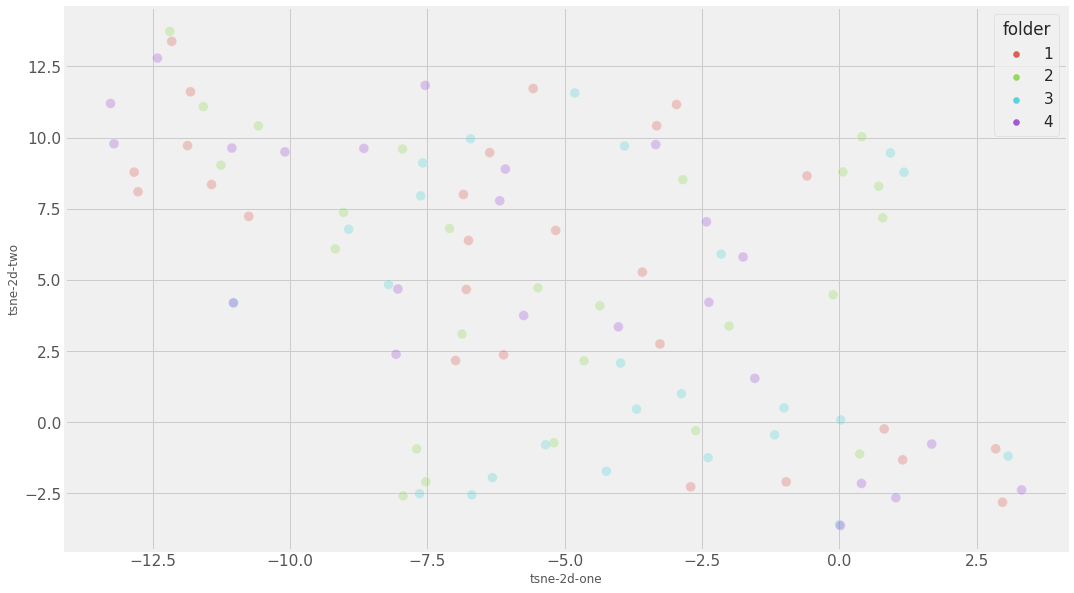

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
#markers={1:}
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="folder",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    s=100
   
)
#style='classlable',

In [ ]:
"""# non covid


np.random.seed(42)
rndperm = np.random.permutation(df2.shape[0])

feat_cols = [ 'pixel'+str(i) for i in range(df2.shape[1]-1) ]
feat_cols.append('classlable') #y

df2.columns=feat_cols

df2['label'] = df2['classlable'].apply(lambda i: str(i))"""



In [ ]:
"""print('Size of the dataframe: {}'.format(df2.shape))"""

Size of the dataframe: (1185, 198)


In [ ]:
"""N = 1185
df_subset = df2.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))"""

Explained variation per principal component: [0.26298273 0.12920924 0.08878591]


In [ ]:
"""import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))"""

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1185 samples in 0.000s...
[t-SNE] Computed neighbors for 1185 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1185
[t-SNE] Computed conditional probabilities for sample 1185 / 1185
[t-SNE] Mean sigma: 10.110192
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.271561
[t-SNE] KL divergence after 5000 iterations: 0.562576
t-SNE done! Time elapsed: 35.50589609146118 seconds


In [ ]:
"""df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="classlable",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3"""
)

In [ ]:
#for result which is not splitted based on covid or non covid

In [ ]:
#for result which is not splitted based on covid or non covid




# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(result.shape[0])

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(result.shape[1]-1) ]
feat_cols.append('classlable') #y

In [ ]:
result.columns=feat_cols

In [ ]:
result['label'] = result['classlable'].apply(lambda i: str(i))

In [ ]:
print('Size of the dataframe: {}'.format(result.shape))

Size of the dataframe: (2409, 198)


In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
N = 2049
df_subset = result.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.25092866 0.12512427 0.09504361]


In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2049 samples in 0.001s...
[t-SNE] Computed neighbors for 2049 samples in 0.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2049
[t-SNE] Computed conditional probabilities for sample 2000 / 2049
[t-SNE] Computed conditional probabilities for sample 2049 / 2049
[t-SNE] Mean sigma: 9.577826
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.568123
[t-SNE] KL divergence after 300 iterations: 1.222834
t-SNE done! Time elapsed: 10.542513370513916 seconds


In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="classlable",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [ ]:

#Patient wise data split

#import splitfolders

#main_dir = '/content/drive/MyDrive/subclasses'
output_dir = '/content/drive/MyDrive/covid_images_per_patient'
#splitfolders.ratio(main_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)
train_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'train'),
                                                    class_mode='input',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='input',
                                                        shuffle=True) # set as validation data
test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                  target_size=(224,224),batch_size=32,class_mode='input',shuffle=True)



Found 7746 images belonging to 2 classes.
Found 775 images belonging to 2 classes.
Found 775 images belonging to 2 classes.


In [ ]:
model=autoencoder.fit(train_generator,
steps_per_epoch = train_generator.samples//32,
validation_data= validation_generator,


    validation_steps = validation_generator.samples // 32,
    epochs = 7)

Epoch 1/7
242/242 [==============================] - 942s 4s/step - loss: 0.0479 - accuracy: 0.2257 - val_loss: 0.0299 - val_accuracy: 0.2441
Epoch 2/7
242/242 [==============================] - 115s 475ms/step - loss: 0.0292 - accuracy: 0.2418 - val_loss: 0.0287 - val_accuracy: 0.2153
Epoch 3/7
242/242 [==============================] - 113s 467ms/step - loss: 0.0283 - accuracy: 0.2157 - val_loss: 0.0278 - val_accuracy: 0.2109
Epoch 4/7
242/242 [==============================] - 113s 466ms/step - loss: 0.0278 - accuracy: 0.2121 - val_loss: 0.0274 - val_accuracy: 0.1973
Epoch 5/7
242/242 [==============================] - 112s 464ms/step - loss: 0.0274 - accuracy: 0.2110 - val_loss: 0.0272 - val_accuracy: 0.2067
Epoch 6/7
242/242 [==============================] - 112s 463ms/step - loss: 0.0270 - accuracy: 0.2113 - val_loss: 0.0267 - val_accuracy: 0.2036
Epoch 7/7
242/242 [==============================] - 112s 462ms/step - loss: 0.0268 - accuracy: 0.2190 - val_loss: 0.0268 - val_accur

In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_model3_patient_wise.h5')

In [ ]:

model=keras.models.load_model('/content/drive/MyDrive/autoencoder_model3_patient_wise.h5')


In [ ]:
model.fit(test_generator,
steps_per_epoch = test_generator.samples//32,
validation_data= validation_generator,


    validation_steps = validation_generator.samples // 32,
    epochs = 7)

Epoch 1/7
24/24 [==============================] - 23s 960ms/step - loss: 0.0265 - accuracy: 0.2164 - val_loss: 0.0264 - val_accuracy: 0.2166
Epoch 2/7
24/24 [==============================] - 22s 929ms/step - loss: 0.0265 - accuracy: 0.2188 - val_loss: 0.0266 - val_accuracy: 0.2117
Epoch 3/7
24/24 [==============================] - 21s 904ms/step - loss: 0.0264 - accuracy: 0.2168 - val_loss: 0.0263 - val_accuracy: 0.2241
Epoch 4/7
24/24 [==============================] - 21s 882ms/step - loss: 0.0264 - accuracy: 0.2217 - val_loss: 0.0263 - val_accuracy: 0.2146
Epoch 5/7
24/24 [==============================] - 23s 994ms/step - loss: 0.0264 - accuracy: 0.2209 - val_loss: 0.0263 - val_accuracy: 0.2236
Epoch 6/7
24/24 [==============================] - 24s 997ms/step - loss: 0.0264 - accuracy: 0.2226 - val_loss: 0.0262 - val_accuracy: 0.2246
Epoch 7/7
24/24 [==============================] - 21s 906ms/step - loss: 0.0261 - accuracy: 0.2237 - val_loss: 0.0261 - val_accuracy: 0.2283


In [ ]:
model.save('/content/drive/MyDrive/autoencoder_model3_patient_wise.h5')

In [ ]:
x,y=test_generator.next()
z=autoencoder.predict(x)

NameError: ignored

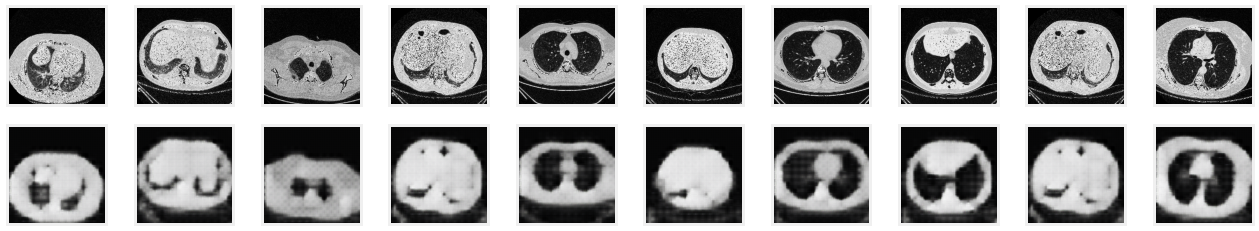

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow((x[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((z[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
k=encoder.predict(x)

In [ ]:
encoder.compile(optimizer='adam')

In [ ]:
encoder.save('/content/drive/MyDrive/encoder_model3_patient_wise.h5')

In [ ]:

#predict by encoder just for train data set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)



data_compressed = train_datagen.flow_from_directory(('/content/drive/MyDrive/patient_wise_new/train'),
                                                    class_mode='binary',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=True)



test_generator= train_datagen.flow_from_directory(('/content/drive/MyDrive/patient_wise_new/test'),
                                                  target_size=(224,224),batch_size=32,class_mode='binary',shuffle=True)


Found 5890 images belonging to 2 classes.
Found 1667 images belonging to 2 classes.


In [ ]:
"""encoder=keras.models.load_model('/content/drive/MyDrive/encoder_model3_patient_wise.h5')"""

In [ ]:
#train
batch_index=0
total_list=[]
while batch_index <= data_compressed.batch_index:
    data,label = data_compressed.next()
    prediction=encoder.predict(data)
    idx = (data_compressed.batch_index - 1) * data_compressed.batch_size
    file_name_batch= data_compressed.filenames[idx : idx + data_compressed.batch_size]
    j=0
    print(len(file_name_batch))
    for i in prediction:
      flat_arr = i.ravel().tolist()
      flat_arr.append(label[j])
      print(j)
      flat_arr.append(file_name_batch[j])             
      j+=1
      total_list.append(flat_arr)

    batch_index = batch_index + 1




In [ ]:
df_patient = pd.DataFrame(total_list)

In [ ]:
#df_patient= df_patient.iloc[:,:-1]

In [ ]:
df_patient=df_patient.assign(classlable=1) #train

In [ ]:
df_patient.to_excel("/content/drive/MyDrive/train_compressed_patient_wise.xlsx") 

In [ ]:
df_patient=pd.read_excel('/content/drive/MyDrive/train_compressed_patient_wise.xlsx')
df_patient=df_patient.assign(classlable=1) #train
df_patient=df_patient.drop('Unnamed: 0',axis=1)

In [ ]:
#test


batch_index=0
total_list=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=encoder.predict(data)
   
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      flat_arr.append(label[j])
      j+=1
      total_list.append(flat_arr)


    batch_index = batch_index + 1



In [ ]:
df_test_patient = pd.DataFrame(total_list)

In [ ]:
#df_test_patient= df_test_patient.iloc[:,:-1]

In [ ]:
df_test_patient=df_test_patient.assign(classlable=0) #test

In [ ]:
df_test_patient.to_excel("/content/drive/MyDrive/test_compressed_patient_wise.xlsx")  #test

In [ ]:
df_test_patient=pd.read_excel('/content/drive/MyDrive/test_compressed_patient_wise.xlsx')
df_test_patient=df_test_patient.assign(classlable=0) #test
df_test_patient=df_test_patient.drop('Unnamed: 0',axis=1)

In [ ]:
frames = [df_patient, df_test_patient]
  
result_patient = pd.concat(frames)
result_patient= result_patient.reset_index(drop=True)
display(result_patient)

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,classlable
0,10.107357,10.560291,10.284877,10.307246,10.381658,10.532340,9.903004,9.745358,9.888646,10.831981,...,6.657392,6.675907,6.664680,6.466007,6.455211,6.927310,5.683734,3.373933,0,1
1,10.342478,10.542439,10.542650,10.599045,10.615575,10.468364,10.382055,10.364619,10.562650,10.579370,...,5.471292,5.586431,5.604479,5.670333,5.042757,6.266154,6.502268,4.400198,0,1
2,10.411299,10.602212,10.396407,10.361721,10.456486,10.505923,10.498190,10.428324,10.555020,10.595094,...,6.763741,6.707391,6.688047,6.974369,6.842908,6.508853,3.265465,5.272976,1,1
3,10.164828,10.128432,9.603258,9.321657,9.280905,9.626186,9.765912,9.690544,9.997081,10.102291,...,3.304849,3.788763,4.763246,5.257336,5.486138,4.917527,5.705332,3.915696,1,1
4,10.411546,10.688615,10.678168,10.681422,10.800957,10.798765,10.823419,10.621757,10.735147,10.756762,...,5.068465,5.136066,5.157390,5.004228,5.606150,6.402036,6.845092,4.045377,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7552,9.576313,9.805153,9.921432,9.966269,10.187449,10.514535,10.465119,10.335959,10.625329,10.594661,...,4.433475,4.355660,4.213210,4.123437,4.149572,4.451487,6.613148,9.335617,0,0
7553,5.025166,5.254571,5.239470,5.220140,5.204204,5.242908,5.269318,5.227167,5.204201,5.213035,...,4.593802,4.732167,4.663956,4.492830,4.475809,3.214077,4.436512,4.709567,0,0
7554,8.937539,8.861867,9.075269,9.206376,9.353263,9.753461,9.828858,9.919341,9.961846,9.922085,...,5.315476,5.244273,5.182899,5.150567,6.167453,6.347702,5.304369,3.015822,1,0
7555,9.830043,9.923739,9.916518,10.162021,10.105212,10.413620,10.305898,9.801665,10.302914,10.376588,...,6.513392,6.594525,6.585910,6.506812,6.251589,5.927511,3.985325,5.908890,1,0


In [ ]:
result=result.drop('Unnamed: 0',axis=1)

In [ ]:
xx=result_patient.loc[result_patient['classlable']==1]
xx= xx.loc[xx['y']==1]
xx= xx.iloc[:100,:]

In [ ]:
z=[]
for i in range (100):
  if i <=25:
    z.append(1)
  elif i>25 and i<=50:
    z.append(2)
  elif i>50 and i<=75:
    z.append(3)
  else:
    z.append(4)      

In [ ]:
xx= xx.assign(folder=z)

In [ ]:
xx

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,y,classlable,folder
2,10.411299,10.602212,10.396407,10.361721,10.456486,10.505923,10.498190,10.428324,10.555020,10.595094,...,6.707391,6.688047,6.974369,6.842908,6.508853,3.265465,5.272976,1,1,1
3,10.164828,10.128432,9.603258,9.321657,9.280905,9.626186,9.765912,9.690544,9.997081,10.102291,...,3.788763,4.763246,5.257336,5.486138,4.917527,5.705332,3.915696,1,1,1
5,9.978127,9.785889,9.466416,9.934678,10.122425,10.013195,9.993274,10.383410,10.178061,10.039427,...,4.376770,4.555283,5.218261,5.012364,5.660633,5.860426,4.900954,1,1,1
7,10.036204,10.307949,10.368400,10.365254,10.480281,10.330462,10.442415,10.226686,10.266059,10.470978,...,6.477945,6.710269,7.078501,7.154403,6.690816,3.681265,4.036617,1,1,1
11,9.912445,9.752088,9.213452,8.970969,8.889073,9.411469,10.206629,8.708322,8.660682,8.232667,...,7.442688,7.274958,6.855151,6.402630,4.594500,4.840424,4.924412,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,10.448536,10.618224,10.637940,10.548476,10.658018,10.675957,10.514536,10.718211,10.808703,10.653118,...,5.507081,5.156753,5.451182,5.395463,5.745935,5.659949,3.138378,1,1,4
195,10.207230,10.409675,10.335187,10.472111,10.512431,10.534561,10.523712,10.626671,10.301052,10.415111,...,5.945890,5.876269,5.190178,3.704816,5.006699,9.315259,8.968557,1,1,4
198,10.401381,10.612419,10.183829,10.353444,10.356977,10.280532,10.396076,10.365067,10.353792,10.222994,...,5.345462,5.360305,6.294517,6.584766,6.669701,6.617348,3.579464,1,1,4
199,10.316012,10.459146,10.539651,10.632676,10.737543,10.729669,10.741456,10.751771,10.756584,10.718938,...,7.201939,7.031188,6.785385,6.572326,3.589990,5.920022,6.066105,1,1,4


In [ ]:
result_patient.to_excel("/content/drive/MyDrive/result_compressed_patient_wise.xlsx")  #test

In [ ]:
result_patient=pd.read_excel('/content/drive/MyDrive/result_compressed_patient_wise.xlsx')
result_patient=result_patient.drop('Unnamed: 0',axis=1)


In [ ]:
"""df1_patient =result_patient.loc[result_patient[196]==1,] # covid

df2_patient =result_patient.loc[result_patient[196]==0] # noncovid"""

In [ ]:
"""df1_patient= df1_patient.drop(196,axis=1)
df1_patient = df1_patient.reset_index(drop=True)

df2_patient= df2_patient.drop(196,axis=1)
df2_patient = df2_patient.reset_index(drop=True)"""

PLOTTING DATA 

In [ ]:


np.random.seed(42)
rndperm = np.random.permutation(result_patient.shape[0])

feat_cols = [ 'pixel'+str(i) for i in range(result_patient.shape[1]-2) ]
feat_cols.append('y') #y
feat_cols.append('classlable')
result_patient.columns=feat_cols

"""df1_patient['label'] = df1_patient['classlable'].apply(lambda i: str(i))"""

print('Size of the dataframe: {}'.format(result_patient.shape))

Size of the dataframe: (7557, 198)


In [ ]:
result_new= result_patient.loc[:, result_patient.columns != 'classlable']
l1= list(result_patient['classlable'])

In [ ]:
import random
random.shuffle(l1)

In [ ]:
result_new= result_new.assign(classlable=l1)

In [ ]:
result_patient

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,y,classlable
0,10.107357,10.560291,10.284877,10.307246,10.381658,10.532340,9.903004,9.745358,9.888646,10.831981,...,6.657392,6.675907,6.664680,6.466007,6.455211,6.927310,5.683734,3.373933,0,1
1,10.342478,10.542439,10.542650,10.599045,10.615575,10.468364,10.382055,10.364619,10.562650,10.579370,...,5.471292,5.586431,5.604479,5.670333,5.042757,6.266154,6.502268,4.400198,0,1
2,10.411299,10.602212,10.396407,10.361721,10.456486,10.505923,10.498190,10.428324,10.555020,10.595094,...,6.763741,6.707391,6.688047,6.974369,6.842908,6.508853,3.265465,5.272976,1,1
3,10.164828,10.128432,9.603258,9.321657,9.280905,9.626186,9.765912,9.690544,9.997081,10.102291,...,3.304849,3.788763,4.763246,5.257336,5.486138,4.917527,5.705332,3.915696,1,1
4,10.411546,10.688615,10.678168,10.681422,10.800957,10.798765,10.823419,10.621757,10.735147,10.756762,...,5.068465,5.136066,5.157390,5.004228,5.606150,6.402036,6.845092,4.045377,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7552,9.576313,9.805153,9.921432,9.966269,10.187449,10.514535,10.465119,10.335959,10.625329,10.594661,...,4.433475,4.355660,4.213210,4.123437,4.149572,4.451487,6.613148,9.335617,0,0
7553,5.025166,5.254571,5.239470,5.220140,5.204204,5.242908,5.269318,5.227167,5.204201,5.213035,...,4.593802,4.732167,4.663956,4.492830,4.475809,3.214077,4.436512,4.709567,0,0
7554,8.937539,8.861867,9.075269,9.206376,9.353263,9.753461,9.828858,9.919341,9.961846,9.922085,...,5.315476,5.244273,5.182899,5.150567,6.167453,6.347702,5.304369,3.015822,1,0
7555,9.830043,9.923739,9.916518,10.162021,10.105212,10.413620,10.305898,9.801665,10.302914,10.376588,...,6.513392,6.594525,6.585910,6.506812,6.251589,5.927511,3.985325,5.908890,1,0


In [ ]:
result_new

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,y,classlable
0,10.107357,10.560291,10.284877,10.307246,10.381658,10.532340,9.903004,9.745358,9.888646,10.831981,...,6.657392,6.675907,6.664680,6.466007,6.455211,6.927310,5.683734,3.373933,0,1
1,10.342478,10.542439,10.542650,10.599045,10.615575,10.468364,10.382055,10.364619,10.562650,10.579370,...,5.471292,5.586431,5.604479,5.670333,5.042757,6.266154,6.502268,4.400198,0,1
2,10.411299,10.602212,10.396407,10.361721,10.456486,10.505923,10.498190,10.428324,10.555020,10.595094,...,6.763741,6.707391,6.688047,6.974369,6.842908,6.508853,3.265465,5.272976,1,1
3,10.164828,10.128432,9.603258,9.321657,9.280905,9.626186,9.765912,9.690544,9.997081,10.102291,...,3.304849,3.788763,4.763246,5.257336,5.486138,4.917527,5.705332,3.915696,1,1
4,10.411546,10.688615,10.678168,10.681422,10.800957,10.798765,10.823419,10.621757,10.735147,10.756762,...,5.068465,5.136066,5.157390,5.004228,5.606150,6.402036,6.845092,4.045377,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7552,9.576313,9.805153,9.921432,9.966269,10.187449,10.514535,10.465119,10.335959,10.625329,10.594661,...,4.433475,4.355660,4.213210,4.123437,4.149572,4.451487,6.613148,9.335617,0,1
7553,5.025166,5.254571,5.239470,5.220140,5.204204,5.242908,5.269318,5.227167,5.204201,5.213035,...,4.593802,4.732167,4.663956,4.492830,4.475809,3.214077,4.436512,4.709567,0,1
7554,8.937539,8.861867,9.075269,9.206376,9.353263,9.753461,9.828858,9.919341,9.961846,9.922085,...,5.315476,5.244273,5.182899,5.150567,6.167453,6.347702,5.304369,3.015822,1,1
7555,9.830043,9.923739,9.916518,10.162021,10.105212,10.413620,10.305898,9.801665,10.302914,10.376588,...,6.513392,6.594525,6.585910,6.506812,6.251589,5.927511,3.985325,5.908890,1,1


In [ ]:
N=500
df_subset =  result_patient.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
"""pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))"""

"pca = PCA(n_components=3)\npca_result = pca.fit_transform(data_subset)\ndf_subset['pca-one'] = pca_result[:,0]\ndf_subset['pca-two'] = pca_result[:,1] \ndf_subset['pca-three'] = pca_result[:,2]\nprint('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))"

In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset[:,:-2])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 11.595981
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.763626
[t-SNE] KL divergence after 1950 iterations: 0.699538
t-SNE done! Time elapsed: 7.5844292640686035 seconds


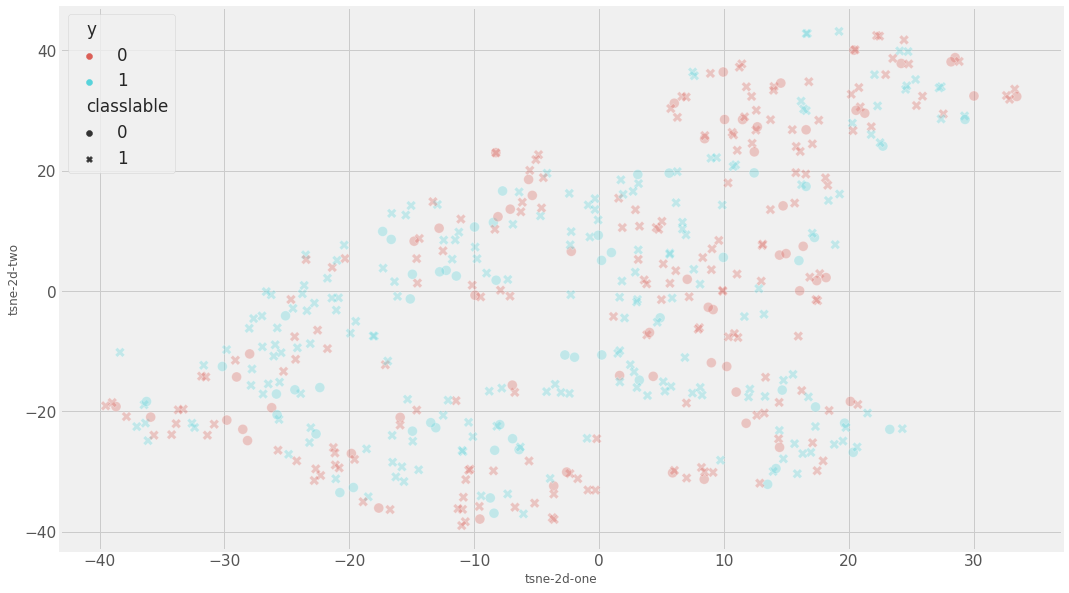

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=result_new["y"],
    style= result_new['classlable'],
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    s=100
   
)

In [ ]:
# non covid

In [ ]:
# non covid


np.random.seed(42)
rndperm = np.random.permutation(df2_patient.shape[0])

feat_cols = [ 'pixel'+str(i) for i in range(df2_patient.shape[1]-2) ]
feat_cols.append('classlable') #y
feat_cols.append('Label')
df2_patient.columns=feat_cols

df2_patient['label'] = df2_patient['classlable'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df1_patient.shape))


In [ ]:
print('Size of the dataframe: {}'.format(df1_patient.shape))

Size of the dataframe: (3450, 198)


In [ ]:

df_subset = df2_patient.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Size of the dataframe: {}'.format(df1_patient.shape))

Explained variation per principal component: [0.26221353 0.1152142  0.09013846]
Size of the dataframe: (3450, 198)


In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.001s...
[t-SNE] Computed neighbors for 3450 samples in 0.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 8.541203
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.009338
[t-SNE] KL divergence after 5000 iterations: 0.508231
t-SNE done! Time elapsed: 91.66973400115967 seconds


In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="classlable",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
   
)

In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.001s...
[t-SNE] Computed neighbors for 3450 samples in 0.323s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 1.653490
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.003571
[t-SNE] KL divergence after 5000 iterations: 0.351224
t-SNE done! Time elapsed: 76.26653051376343 seconds


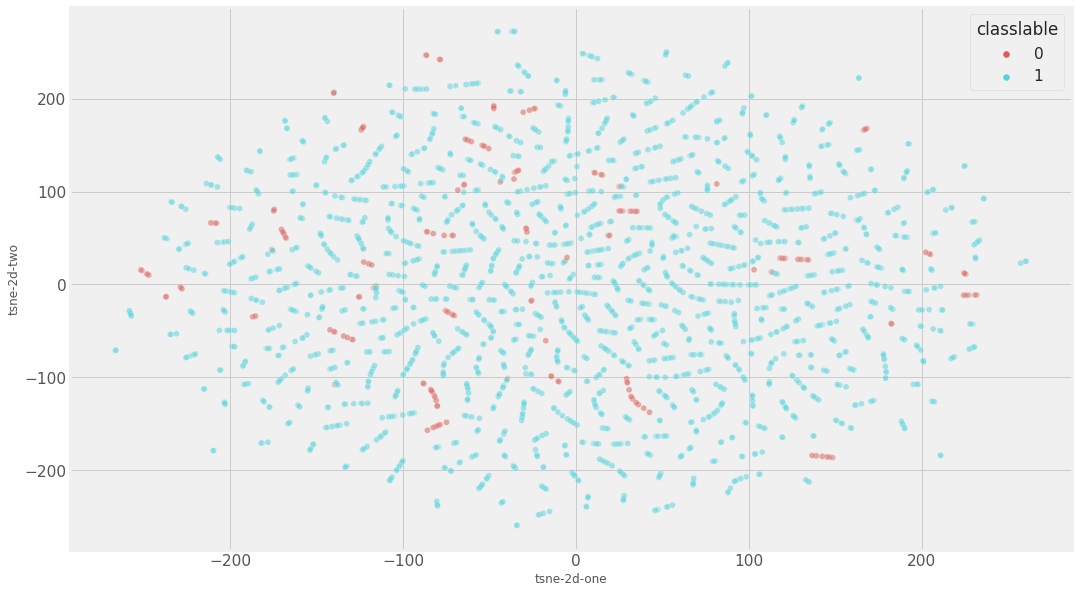

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="classlable",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
   
)

In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.001s...
[t-SNE] Computed neighbors for 3450 samples in 0.450s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 10.061200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.185791
[t-SNE] KL divergence after 5000 iterations: 0.607354
t-SNE done! Time elapsed: 159.18074226379395 seconds


In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="classlable",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
   
)

In [ ]:
# without splittine covid and non covid 

In [ ]:
# without splittine covid and non covid 

In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(result_patient.shape[0])

In [ ]:
result_patient=result_patient.drop('Unnamed: 0',axis=1)

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(result_patient.shape[1]-1) ]
feat_cols.append('classlable') #y

In [ ]:
result_patient.columns=feat_cols

In [ ]:
result_patient['label'] = result_patient['classlable'].apply(lambda i: str(i))

In [ ]:
print('Size of the dataframe: {}'.format(result_patient.shape))

Size of the dataframe: (8521, 198)


In [ ]:
N = 
df_subset = result_patient.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.23424529 0.12401014 0.09973679]


In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8521 samples in 0.005s...
[t-SNE] Computed neighbors for 8521 samples in 2.203s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8521
[t-SNE] Computed conditional probabilities for sample 2000 / 8521
[t-SNE] Computed conditional probabilities for sample 3000 / 8521
[t-SNE] Computed conditional probabilities for sample 4000 / 8521
[t-SNE] Computed conditional probabilities for sample 5000 / 8521
[t-SNE] Computed conditional probabilities for sample 6000 / 8521
[t-SNE] Computed conditional probabilities for sample 7000 / 8521
[t-SNE] Computed conditional probabilities for sample 8000 / 8521
[t-SNE] Computed conditional probabilities for sample 8521 / 8521
[t-SNE] Mean sigma: 8.190294
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.248398
[t-SNE] KL divergence after 1000 iterations: 0.890729
t-SNE done! Time elapsed: 62.816216468811035 seconds


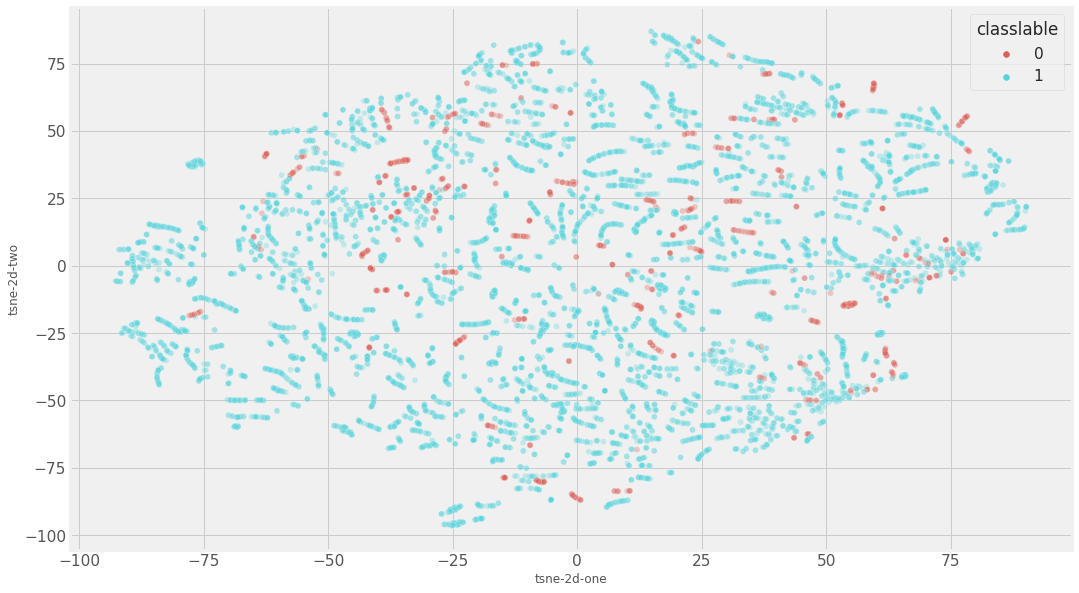

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="classlable",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [ ]:
#end of tsne

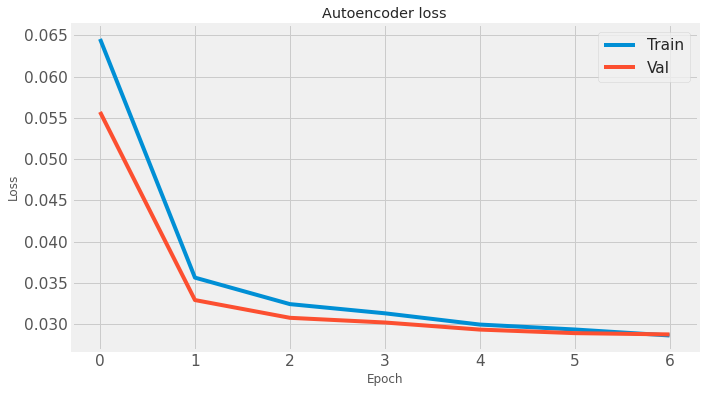

In [ ]:
#mse

plt.figure(figsize=(10, 6))
# history.history stores the training and validation loss of our model when fitting
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('Autoencoder loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

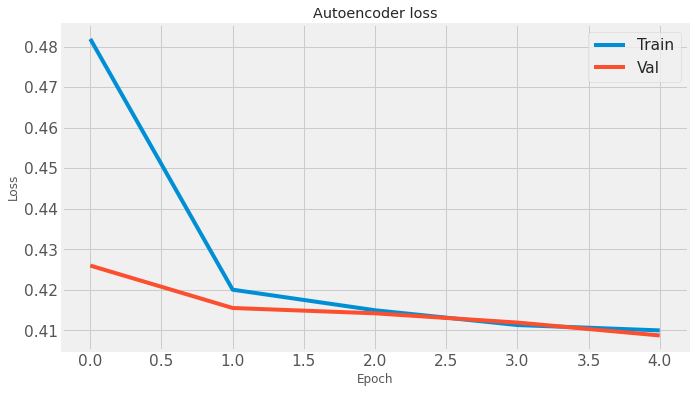

In [ ]:
plt.figure(figsize=(10, 6))
# history.history stores the training and validation loss of our model when fitting
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('Autoencoder loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
x,y=test_generator.next()
z=autoencoder.predict(x)

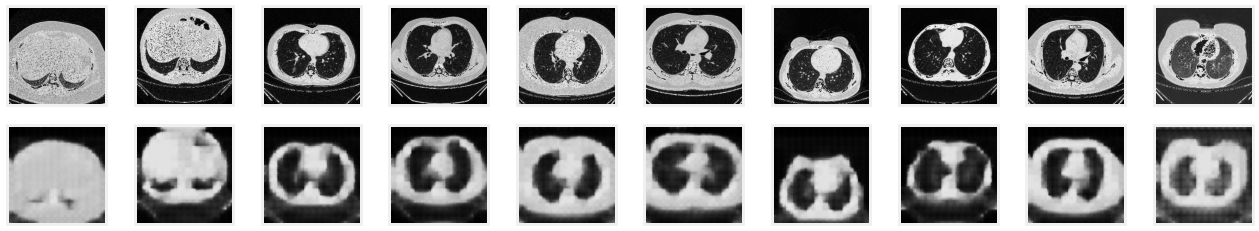

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow((x[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((z[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

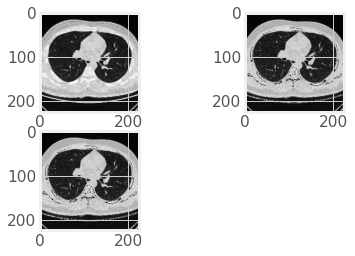

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
plt.imshow((z[3] * 255).astype(np.uint8))
ax2 = fig.add_subplot(2,2,2)
plt.imshow((x[3] * 255).astype(np.uint8))
ax3=fig.add_subplot(2,2,3)
plt.imshow((y[3] * 255).astype(np.uint8))

In [ ]:
k=encoder.predict(x)

In [ ]:
encoder.compile(optimizer='adam')

In [ ]:
encoder.save('/content/drive/MyDrive/encoder_model1.h5')

In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_model1.h5')

IN THE FOLLOWING WE COMMENT SOME OF OUR PERSONAL TESTS TO BETTER understanding our way!

In [ ]:

"""#predict by encoder just for train data set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)


data_compressed = train_datagen.flow_from_directory(os.path.join('/content/drive/MyDrive/covid-images/train'),
                                                    class_mode='binary',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=False)"""

Found 6045 images belonging to 2 classes.


In [ ]:
"""
batch_index=0
total_list=[]
while batch_index <= data_compressed.batch_index:
    data,label = data_compressed.next()
    prediction=encoder.predict(data)
   
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      flat_arr.append(label[j])
      j+=1
      total_list.append(flat_arr)


    batch_index = batch_index + 1
"""

In [ ]:
"""df = pd.DataFrame(total_list)"""

In [ ]:
"""df['patient_number']=name_pat"""

In [ ]:
"""df.to_excel("/content/drive/MyDrive/output_patient_number.xlsx") """

In [ ]:
"""# evaluate compressed data on a simple model
!unzip /content/drive/MyDrive/output.xlsx.zip"""

Archive:  /content/drive/MyDrive/output.xlsx.zip
  inflating: output.xlsx             
   creating: __MACOSX/
  inflating: __MACOSX/._output.xlsx  


In [ ]:
"""my_file=pd.read_excel('output.xlsx')"""

In [ ]:
"""my_file=my_file.drop('Unnamed: 0',axis=1)"""

In [ ]:
"""reshape_data = my_file.values.reshape(6045, 14, 14,1)"""

In [ ]:
"""import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow((x[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((z[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()"""

In [ ]:
"""target=my_file.iloc[:,-1]"""

In [ ]:
"""my_file = my_file.iloc[: , :-1]"""

In [ ]:
"""from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
 


input = layers.Input(shape=(14, 14, 1))

# Conv1 #
my_model = Conv2D(filters = 32, kernel_size = (3,3), activation='relu', padding='same')(input)
my_model=Flatten()(my_model)
my_model = Dense(32, activation="relu")(my_model)
my_model=Dense(1, activation='sigmoid')(my_model)
opt= tf.keras.optimizers.RMSprop(lr=0.003)
model = Model(input, my_model)
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

"""

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
"""#M1


from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(14,14,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(1))

model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['acc'])




"""

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
"""X_train, X_test, y_train, y_test = train_test_split(reshape_data , target , test_size=0.1, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=32)"""

In [ ]:
"""model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=20)"""

In [ ]:
"""model.fit(X_train,y_train,batch_size=32,epochs=10)"""

In [ ]:
"""'40%' is not a valid value for loc; supported values are 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
"""

## Finally we decide to sample some folders and plot data in slice-wise and 

---

# subject-wise data split manner without using compresed version of data. The initiall image is achieved by TSNE in non-comprsed version of selected data. 

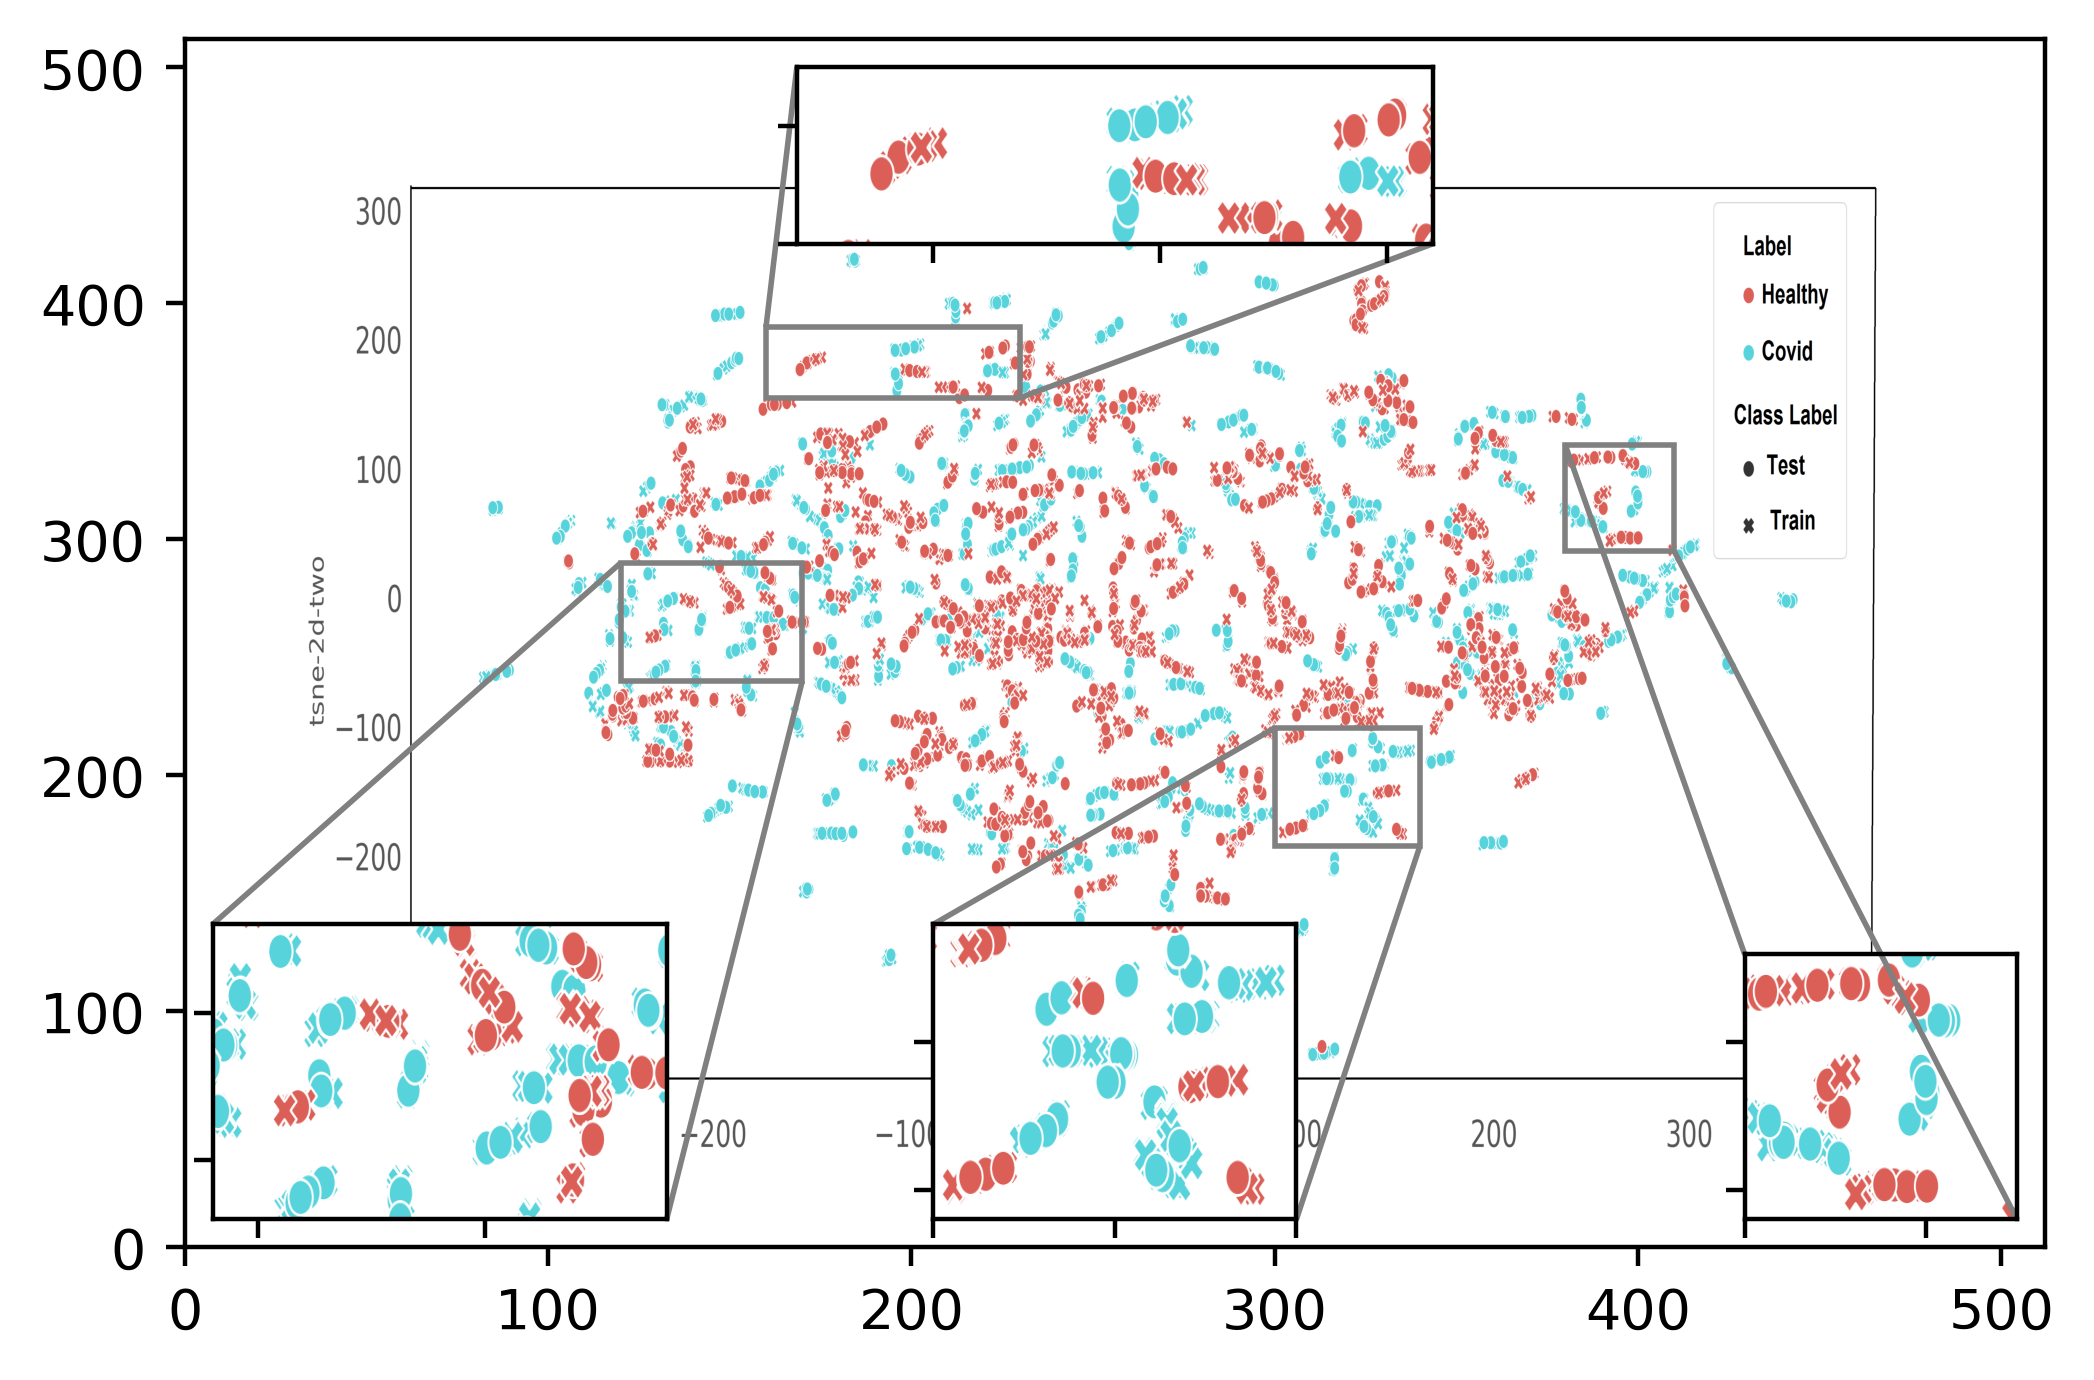

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy import misc
import cv2
fig = plt.figure()
ax = fig.add_subplot(111)

image = cv2.imread("/content/Instant-wise-p10 (2).png")

ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),extent=[0,512,0,512], aspect='auto')

axins = zoomed_inset_axes(ax, 2.5, loc='lower right')
axins.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), extent=[0,512,0,512],aspect='auto')
axins.set_xlim(380, 410)
axins.set_ylim(295, 340)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.yaxis.get_major_locator().set_params(nbins=2)
axins.xaxis.get_major_locator().set_params(nbins=2)
axins.tick_params(labelleft=False, labelbottom=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()

axins = zoomed_inset_axes(ax, 2.5, loc='upper center')
axins.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), extent=[0,512,0,512],aspect='auto')
axins.set_xlim(160, 230)
axins.set_ylim(360, 390)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.yaxis.get_major_locator().set_params(nbins=2)
axins.xaxis.get_major_locator().set_params(nbins=2)
axins.tick_params(labelleft=False, labelbottom=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()

axins = zoomed_inset_axes(ax, 2.5, loc='lower left')
axins.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), extent=[0,512,0,512],aspect='auto')
axins.set_xlim(120, 170)
axins.set_ylim(240, 290)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.yaxis.get_major_locator().set_params(nbins=2)
axins.xaxis.get_major_locator().set_params(nbins=2)
axins.tick_params(labelleft=False, labelbottom=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()

axins = zoomed_inset_axes(ax, 2.5, loc='lower center')
axins.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), extent=[0,512,0,512],aspect='auto')
axins.set_xlim(300, 340)
axins.set_ylim(170, 220)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.yaxis.get_major_locator().set_params(nbins=2)
axins.xaxis.get_major_locator().set_params(nbins=2)
axins.tick_params(labelleft=False, labelbottom=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
#plt.legend()  
plt.gcf().set_dpi(400)





plt.show()